import

In [9]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split


Load Dataset

We’ll use the Iris dataset for this example:

In [10]:
data = load_iris()
X = data.data  # Features
y = data.target  # Labels

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


#### **Scaling Techniques**

##### **Standardization: Using `StandardScaler`**

Standardization (Z-score normalization) rescales the data so that it has a mean of 0 and a standard deviation of 1.

-   **Formula**: z=x−μσz = \frac{x - \mu}{\sigma}z=σx−μ​
    -   μ\muμ is the mean of the feature
    -   σ\sigmaσ is the standard deviation of the feature
    This ensures that the transformed features will have a mean of approximately 0 and a standard deviation of approximately 1.

In [11]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)

# Transform the test data (using the same scaler fitted to the training data)
X_test_scaled = scaler.transform(X_test)

# Check the mean and standard deviation of the scaled data
print("Training data mean:", np.mean(X_train_scaled, axis=0))
print("Training data standard deviation:", np.std(X_train_scaled, axis=0))


Training data mean: [ 2.57148800e-15 -9.89254974e-16 -2.91830052e-16  1.20538500e-16]
Training data standard deviation: [1. 1. 1. 1.]


Normalization: Using MinMaxScaler

Normalization rescales the data to a fixed range, typically between 0 and 1. This is useful when the data needs to be bounded within a specific range.

After applying MinMax scaling, all values in X_train_normalized and X_test_normalized will lie within the range [0, 1].

In [12]:
# Create a MinMaxScaler instance
scaler = MinMaxScaler()

# Fit and transform the training data
X_train_normalized = scaler.fit_transform(X_train)

# Transform the test data (using the same scaler fitted to the training data)
X_test_normalized = scaler.transform(X_test)

# Check the range of the scaled data
print("Training data range (min, max):", X_train_normalized.min(axis=0), X_train_normalized.max(axis=0))


Training data range (min, max): [0. 0. 0. 0.] [1. 1. 1. 1.]


Compare Scaled Data

Let’s visually compare the original and scaled data to understand the difference.

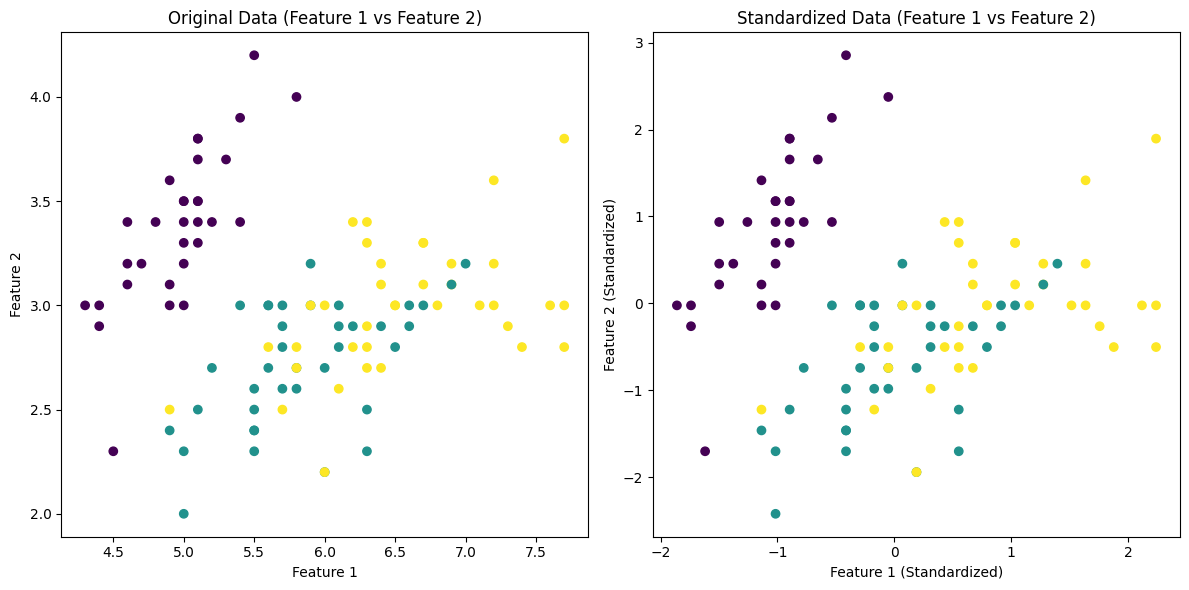

In [13]:
import matplotlib.pyplot as plt

# Plot the original data vs. scaled data
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Original data plot
ax[0].scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='viridis')
ax[0].set_title('Original Data (Feature 1 vs Feature 2)')
ax[0].set_xlabel('Feature 1')
ax[0].set_ylabel('Feature 2')

# Scaled data plot (Standardized)
ax[1].scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], c=y_train, cmap='viridis')
ax[1].set_title('Standardized Data (Feature 1 vs Feature 2)')
ax[1].set_xlabel('Feature 1 (Standardized)')
ax[1].set_ylabel('Feature 2 (Standardized)')

plt.tight_layout()
plt.show()


When to Use Which Scaling Technique

Standardization: Recommended when the model assumes normally distributed data (e.g., Linear Regression, Logistic Regression, SVM, k-NN). It’s often the default choice.

Use when data contains outliers.

Doesn’t have a fixed range.

Normalization: Use when you need a fixed range, often required by algorithms like neural networks or in applications where you need bounded data (e.g., image pixel values).

Works well for algorithms like k-NN, and when the data varies in magnitude.


Summary

StandardScaler: Standardizes features to have mean = 0 and standard deviation = 1.

MinMaxScaler: Normalizes features to lie between a specified range, typically [0, 1].